# Import libraries

In [1]:
%reload_ext autoreload
%autoreload 2
import os
import csv
import numpy as np
import function as func
import datetime
import matplotlib.pyplot as plt
# set colorful lines
cmap = plt.get_cmap('jet')
plt.rcParams['font.size'] = 18
np.set_printoptions(threshold=20)

# Setting

In [2]:
outdir = './output/77K_compare'
if not os.path.isdir(outdir):
    os.mkdir(outdir)
    pass

In [3]:
freq_min = 14.4
freq_max = 14.5
doRebin = True # Rebinning in dat_to_array
rebinmethod = 0 # consider bin edges
binwidth = 1e+6
rbw = 300
nAve = 13000

# Read data

In [4]:
cutEdges = True
data1_norebin = func.read_data(
     freq_min, freq_max, nRun=1,
     datadir='/data/ms2840a/dosue-j/yfactor_77K_fin/2023-03',
     dataprefix='scan_FFT_',
     datasuffix='GHz_span2.50MHz_rbw300Hz_2.0sec_1counts_1runs',
     binary_data=True, rbw=rbw,
     doRebin=False, rebinmethod=rebinmethod, binwidth=binwidth,
     onlyAverage=True, cutEdges=cutEdges, flatten=True)

data2_norebin = func.read_data(
     freq_min, freq_max, nRun=1,
     datadir='/data/ms2840a/dosue-j/yfactor_77K_fin/2023-03-13',
     dataprefix='scan_FFT_',
     datasuffix='GHz_span2.50MHz_rbw300Hz_2.0sec_1counts_1runs',
     binary_data=True, rbw=rbw,
     doRebin=False, rebinmethod=rebinmethod, binwidth=binwidth,
     onlyAverage=True, cutEdges=cutEdges, flatten=True)

data1 = func.read_data(
     freq_min, freq_max, nRun=1,
     datadir='/data/ms2840a/dosue-j/yfactor_77K_fin/2023-03',
     dataprefix='scan_FFT_',
     datasuffix='GHz_span2.50MHz_rbw300Hz_2.0sec_1counts_1runs',
     binary_data=True, rbw=rbw,
     doRebin=doRebin, rebinmethod=rebinmethod, binwidth=binwidth,
     onlyAverage=True, cutEdges=cutEdges, flatten=True)

data2 = func.read_data(
     freq_min, freq_max, nRun=1,
     datadir='/data/ms2840a/dosue-j/yfactor_77K_fin/2023-03-13',
     dataprefix='scan_FFT_',
     datasuffix='GHz_span2.50MHz_rbw300Hz_2.0sec_1counts_1runs',
     binary_data=True, rbw=rbw,
     doRebin=doRebin, rebinmethod=rebinmethod, binwidth=binwidth,
     onlyAverage=True, cutEdges=cutEdges, flatten=True)

freq = 14.399750 GHz
freq = 14.419750 GHz
freq = 14.439750 GHz
freq = 14.459750 GHz
freq = 14.479750 GHz
freq = 14.399750 GHz
freq = 14.419750 GHz
freq = 14.439750 GHz
freq = 14.459750 GHz
freq = 14.479750 GHz
freq = 14.399750 GHz
freq = 14.419750 GHz
freq = 14.439750 GHz
freq = 14.459750 GHz
freq = 14.479750 GHz
freq = 14.399750 GHz
freq = 14.419750 GHz
freq = 14.439750 GHz
freq = 14.459750 GHz
freq = 14.479750 GHz


## Averaging data

In [5]:
freq1_nr, W1_nr, Werr1_nr = data1_norebin[0], data1_norebin[1], data1_norebin[2]
freq2_nr, W2_nr, Werr2_nr = data2_norebin[0], data2_norebin[1], data2_norebin[2]

freq1_nr_ave, tmp = func.average_list(freq1_nr, nAve)
W1_nr_ave, tmp = func.average_list(W1_nr, nAve)
freq2_nr_ave, tmp = func.average_list(freq2_nr, nAve)
W2_nr_ave, tmp = func.average_list(W2_nr, nAve)

freq1, W1, Werr1 = data1[0], data1[1], data1[2]
freq2, W2, Werr2 = data2[0], data2[1], data2[2]

freq1_ave, tmp = func.average_list(freq1, nAve)
W1_ave, tmp = func.average_list(W1, nAve)
freq2_ave, tmp = func.average_list(freq2, nAve)
W2_ave, tmp = func.average_list(W2, nAve)

In [6]:
func.print_list(freq1_nr)
func.print_list(freq1_nr_ave)
func.print_list(freq1)
print(sum(freq1_nr!=freq2_nr))

freq1_nr (size=(1310750,)) = [1.44000000e+10 1.44000001e+10 1.44000002e+10 ... 1.44999998e+10
 1.44999999e+10 1.45000000e+10]
freq1_nr_ave (size=(100,)) = [1.44004959e+10 1.44014877e+10 1.44024795e+10 ... 1.44967004e+10
 1.44976922e+10 1.44986840e+10]
freq1 (size=(100,)) = [1.440025e+10 1.440125e+10 1.440225e+10 ... 1.449725e+10 1.449825e+10
 1.449925e+10]
0


# Plot
## Plot raw data (No rebinning nor averaging)

/home/dosue/venv/env1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


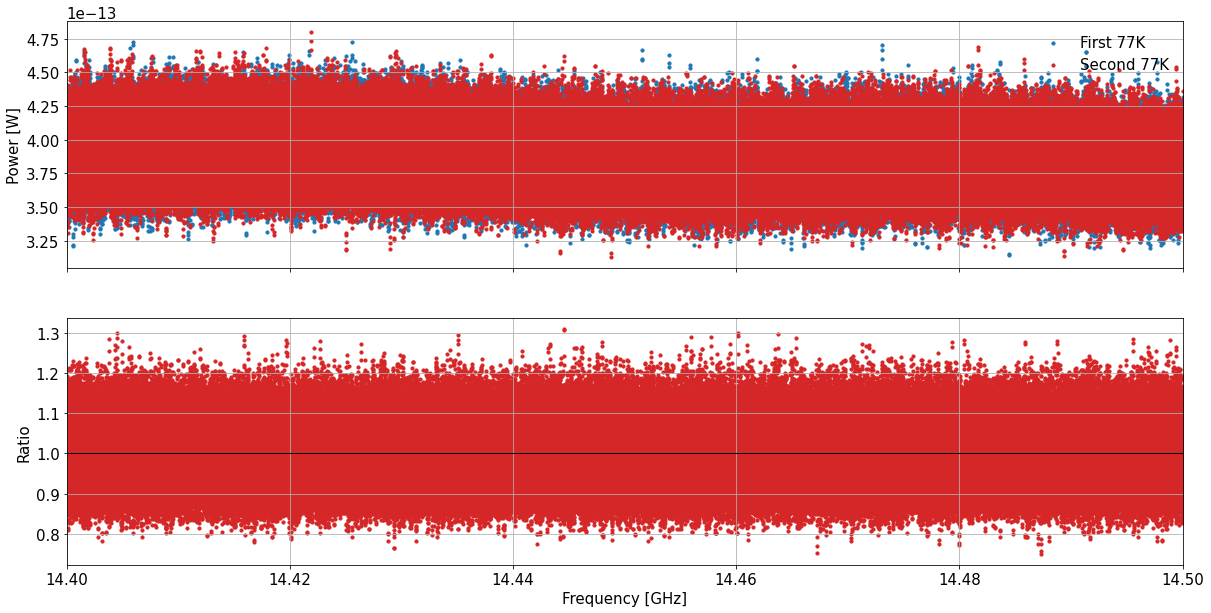

In [7]:
plt.rcParams["font.size"] = 15
fig, axes = plt.subplots(2,1,figsize=(20,10), squeeze=False, sharex=True)

ax = axes[0][0]
ax.scatter(freq1_nr*1e-9, W1_nr, c='tab:blue', label='First 77K', s=10)
ax.scatter(freq2_nr*1e-9, W2_nr, c='tab:red', label='Second 77K', s=10)
ax.set_xlim([freq_min, freq_max])
ax.set_ylabel('Power [W]')
ax.legend(frameon=False)
ax.grid(True)

ax = axes[1][0]
ax.scatter(freq1_nr*1e-9, W2_nr/W1_nr, c='tab:red', label='Second/First', s=10)
ax.plot([0,100],[1,1], c='k', lw=1)
ax.set_xlim([freq_min, freq_max])
ax.set_ylabel('Ratio')
ax.set_xlabel('Frequency [GHz]')
ax.grid(True)

# Plot rebinned or averaged data
### Rebinning in read_data (RBW= {{binwidth}} Hz)
{{binwidth}}

Ratio = 0.997124589354825--1.0033606960552013


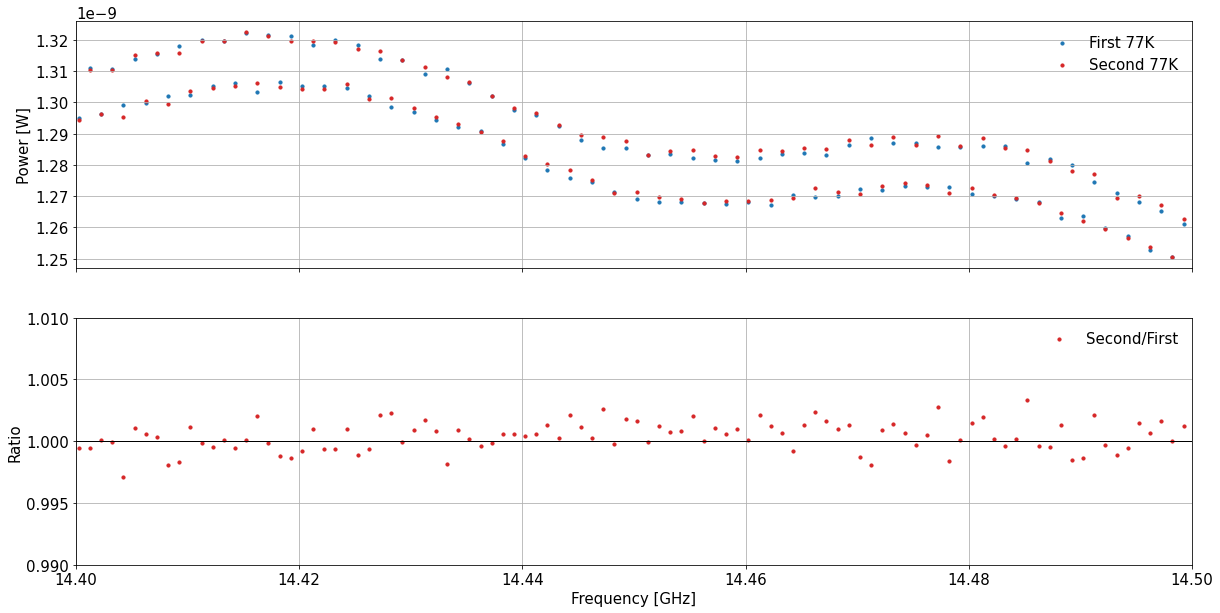

In [12]:
plt.rcParams["font.size"] = 15
fig, axes = plt.subplots(2,1,figsize=(20,10), squeeze=False, sharex=True)

ax = axes[0][0]
ax.scatter(freq1*1e-9, W1, c='tab:blue', label='First 77K', s=10)
ax.scatter(freq2*1e-9, W2, c='tab:red', label='Second 77K', s=10)
ax.set_xlim([freq_min, freq_max])
ax.set_ylabel('Power [W]')
ax.legend(frameon=False)
ax.grid(True)

ax = axes[1][0]
ax.scatter(freq1*1e-9, W2/W1, c='tab:red', label='Second/First', s=10)
ax.plot([0,100],[1,1], c='k', lw=1)
ax.set_xlim([freq_min, freq_max])
ax.set_ylim([0.99,1.01])
ax.legend(frameon=False)
ax.set_ylabel('Ratio')
ax.set_xlabel('Frequency [GHz]')
ax.grid(True)
print(f'Ratio = {min(W2/W1)}--{max(W2/W1)}')

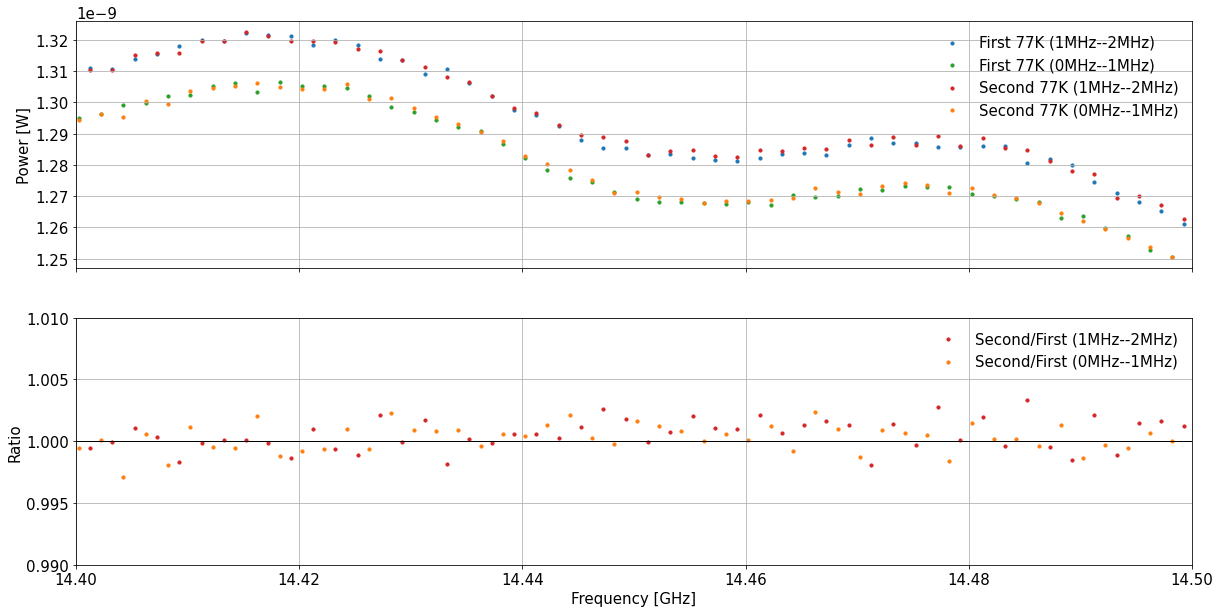

In [9]:
plt.rcParams["font.size"] = 15
fig, axes = plt.subplots(2,1,figsize=(20,10), squeeze=False, sharex=True)

ind1_1 = np.where( freq1%2000000 >= 1000000 )
ind1_2 = np.where( freq1%2000000 < 1000000 )
freq1_1 = freq1[ind1_1]
freq1_2 = freq1[ind1_2]
W1_1 = W1[ind1_1]
W1_2 = W1[ind1_2]
ind2_1 = np.where( freq2%2000000 >= 1000000 )
ind2_2 = np.where( freq2%2000000 < 1000000 )
freq2_1 = freq2[ind2_1]
freq2_2 = freq2[ind2_2]
W2_1 = W2[ind2_1]
W2_2 = W2[ind2_2]

ax = axes[0][0]
ax.scatter(freq1_1*1e-9, W1_1, c='tab:blue',  label='First 77K (1MHz--2MHz)', s=10)
ax.scatter(freq1_2*1e-9, W1_2, c='tab:green', label='First 77K (0MHz--1MHz)', s=10)
ax.scatter(freq2_1*1e-9, W2_1, c='tab:red',    label='Second 77K (1MHz--2MHz)', s=10)
ax.scatter(freq2_2*1e-9, W2_2, c='tab:orange', label='Second 77K (0MHz--1MHz)', s=10)
ax.set_xlim([freq_min, freq_max])
ax.set_ylabel('Power [W]')
ax.legend(frameon=False)
ax.grid(True)

ax = axes[1][0]
ax.scatter(freq1_1*1e-9, W2_1/W1_1, c='tab:red',    label='Second/First (1MHz--2MHz)', s=10)
ax.scatter(freq1_2*1e-9, W2_2/W1_2, c='tab:orange', label='Second/First (0MHz--1MHz)', s=10)
ax.plot([0,100],[1,1], c='k', lw=1)
ax.set_xlim([freq_min, freq_max])
ax.set_ylim([0.99,1.01])
ax.set_ylabel('Ratio')
ax.set_xlabel('Frequency [GHz]')
ax.legend(frameon=False)
ax.grid(True)

### Averaging after read_data (RBW=300Hz)

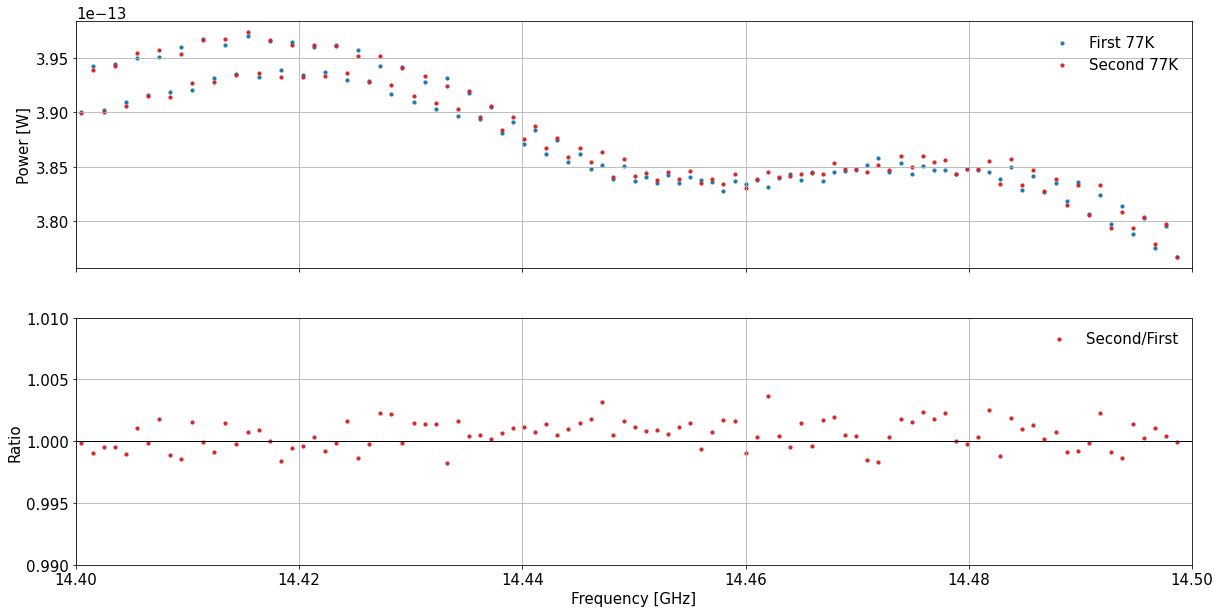

In [10]:
plt.rcParams["font.size"] = 15
fig, axes = plt.subplots(2,1,figsize=(20,10), squeeze=False, sharex=True)

ax = axes[0][0]
ax.scatter(freq1_nr_ave*1e-9, W1_nr_ave, c='tab:blue', label='First 77K', s=10)
ax.scatter(freq2_nr_ave*1e-9, W2_nr_ave, c='tab:red', label='Second 77K', s=10)
ax.set_xlim([freq_min, freq_max])
ax.set_ylabel('Power [W]')
ax.legend(frameon=False)
ax.grid(True)

ax = axes[1][0]
ax.scatter(freq1_nr_ave*1e-9, W2_nr_ave/W1_nr_ave, c='tab:red', label='Second/First', s=10)
ax.plot([0,100],[1,1], c='k', lw=1)
ax.set_xlim([freq_min, freq_max])
ax.set_ylim([0.99,1.01])
ax.set_ylabel('Ratio')
ax.legend(frameon=False)
ax.set_xlabel('Frequency [GHz]')
ax.grid(True)

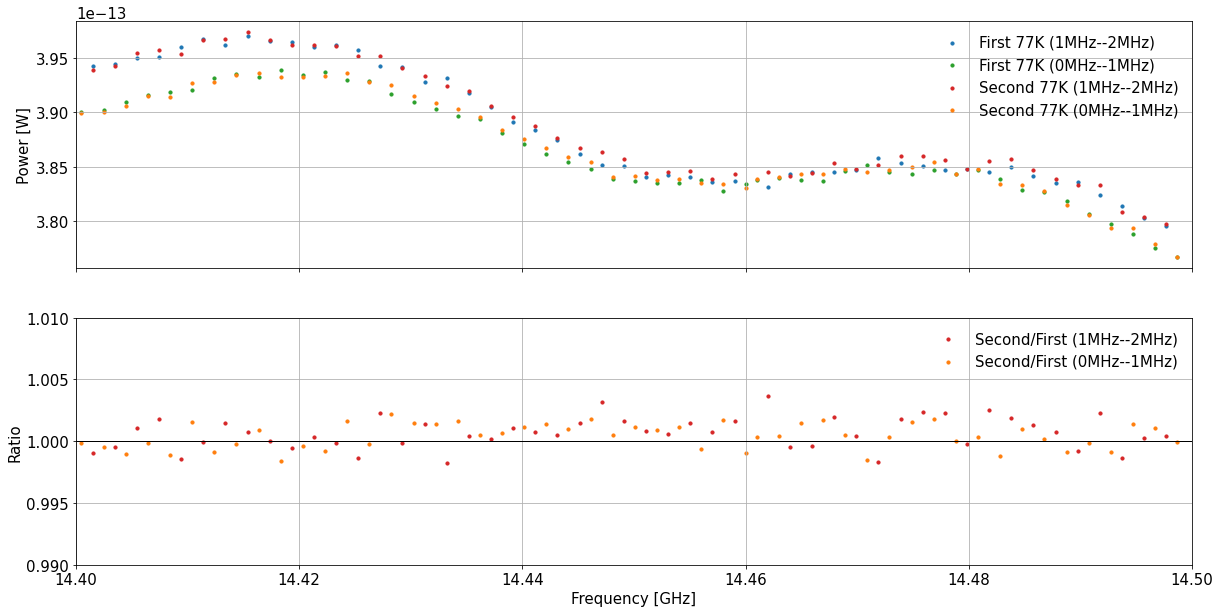

In [11]:
plt.rcParams["font.size"] = 15
fig, axes = plt.subplots(2,1,figsize=(20,10), squeeze=False, sharex=True)

ind1_nr_ave_1 = np.where( freq1_nr_ave%2000000 >= 1000000 )
ind1_nr_ave_2 = np.where( freq1_nr_ave%2000000 < 1000000 )
freq1_nr_ave_1 = freq1_nr_ave[ind1_nr_ave_1]
freq1_nr_ave_2 = freq1_nr_ave[ind1_nr_ave_2]
W1_nr_ave_1 = W1_nr_ave[ind1_nr_ave_1]
W1_nr_ave_2 = W1_nr_ave[ind1_nr_ave_2]
ind2_nr_ave_1 = np.where( freq2_nr_ave%2000000 >= 1000000 )
ind2_nr_ave_2 = np.where( freq2_nr_ave%2000000 < 1000000 )
freq2_nr_ave_1 = freq2_nr_ave[ind2_nr_ave_1]
freq2_nr_ave_2 = freq2_nr_ave[ind2_nr_ave_2]
W2_nr_ave_1 = W2_nr_ave[ind2_nr_ave_1]
W2_nr_ave_2 = W2_nr_ave[ind2_nr_ave_2]

ax = axes[0][0]
ax.scatter(freq1_nr_ave_1*1e-9, W1_nr_ave_1, c='tab:blue',  label='First 77K (1MHz--2MHz)', s=10)
ax.scatter(freq1_nr_ave_2*1e-9, W1_nr_ave_2, c='tab:green', label='First 77K (0MHz--1MHz)', s=10)
ax.scatter(freq2_nr_ave_1*1e-9, W2_nr_ave_1, c='tab:red',    label='Second 77K (1MHz--2MHz)', s=10)
ax.scatter(freq2_nr_ave_2*1e-9, W2_nr_ave_2, c='tab:orange', label='Second 77K (0MHz--1MHz)', s=10)
ax.set_xlim([freq_min, freq_max])
ax.set_ylabel('Power [W]')
ax.legend(frameon=False)
ax.grid(True)

ax = axes[1][0]
ax.scatter(freq1_nr_ave_1*1e-9, W2_nr_ave_1/W1_nr_ave_1, c='tab:red',    label='Second/First (1MHz--2MHz)', s=10)
ax.scatter(freq1_nr_ave_2*1e-9, W2_nr_ave_2/W1_nr_ave_2, c='tab:orange', label='Second/First (0MHz--1MHz)', s=10)
ax.plot([0,100],[1,1], c='k', lw=1)
ax.set_xlim([freq_min, freq_max])
ax.set_ylim([0.99,1.01])
ax.set_ylabel('Ratio')
ax.set_xlabel('Frequency [GHz]')
ax.legend(frameon=False)
ax.grid(True)